<a target="_blank" href="https://colab.research.google.com/github/tomzso/Birdclef2023-/blob/main/BirdCLEF2023_Data_preproccess.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
# Download all the necessary files for the BirdCLEF2023 competition

! gdown  1csRtTkSjkr4zi02A7hh92Vd3-q8bRu9U # https://drive.google.com/file/d/1csRtTkSjkr4zi02A7hh92Vd3-q8bRu9U/view?usp=share_link

! gdown  171Dt710QatK8_fpGOowyOCq0--8iKZNi # https://drive.google.com/file/d/171Dt710QatK8_fpGOowyOCq0--8iKZNi/view?usp=share_link

! gdown  1QZtXYvPpZ9PgvWhS7AjPiKCWmSSx2N3_ # https://drive.google.com/file/d/1QZtXYvPpZ9PgvWhS7AjPiKCWmSSx2N3_/view?usp=share_link

! gdown  1wJOwvbRRhV7-jbCunlT6YI_yuPpRu8mn # https://drive.google.com/file/d/1wJOwvbRRhV7-jbCunlT6YI_yuPpRu8mn/view?usp=share_link

! gdown  1cbB3f6kFGUshonoGIa9C4tUQdZm1UYsY # https://drive.google.com/file/d/1cbB3f6kFGUshonoGIa9C4tUQdZm1UYsY/view?usp=share_link

Downloading...
From: https://drive.google.com/uc?id=1csRtTkSjkr4zi02A7hh92Vd3-q8bRu9U
To: /content/audio_bird_name.csv
100% 148k/148k [00:00<00:00, 69.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=171Dt710QatK8_fpGOowyOCq0--8iKZNi
To: /content/audio_data_Y.csv
100% 76.7k/76.7k [00:00<00:00, 71.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QZtXYvPpZ9PgvWhS7AjPiKCWmSSx2N3_
To: /content/eBird_Taxonomy_v2021.csv
100% 2.01M/2.01M [00:00<00:00, 172MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wJOwvbRRhV7-jbCunlT6YI_yuPpRu8mn
To: /content/sample_submission.csv
100% 3.74k/3.74k [00:00<00:00, 13.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cbB3f6kFGUshonoGIa9C4tUQdZm1UYsY
To: /content/train_metadata.csv
100% 3.60M/3.60M [00:00<00:00, 71.8MB/s]


In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import gdown
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


In [ ]:
# Download the splitted X audio data from the Google Drive which has been saved.
# This jupyter code generated those files: https://colab.research.google.com/drive/14WKdPt7H-psYb-hjG1ftCPeH9wevuJ1A

# Define the Google Drive file ID
file_id = ['1gSu-EkrSYmjxYg18DLKP9VcQs--QqQ0l',
           '1ZLSaUMdrTLjZYk-VUKHALkJNqEHOMUQb',
           '1tW10PTV8wWG0LNjI7tQCxodwDJBofWxS',
           '1s32-Ou0uexEoej3LWdvV3c4sExb7bdM7',
           '1cyExp5s0eNlw3o23vXi50C6eLCFzp-Md',
           '18fLcutxetAPlXIsjO5E8vt5Z96p91uVo',
           '1hUw5dfMJf_xp0V8YK8iUedMLETYi0Box',
           '15t09xUyAGCVfTPJIEFTw2TWlxRk55TJB',
           '1QtPz9aML3FkflFE9kf4fggQaYi2P_vV7',
           '1x_H-RrVesqHbx0CnH0ee2T-W2NnHr-so',
           ]

# Iterate over the files
for i in range(len(file_id)):

  # Define the destination file name
  destination = f'audio_data_X{i + 1}.npy'

  # Download the file using gdown
  gdown.download(f'https://drive.google.com/uc?id={file_id[i]}', destination, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1gSu-EkrSYmjxYg18DLKP9VcQs--QqQ0l
To: /content/audio_data_X1.npy
100%|██████████| 272M/272M [00:01<00:00, 250MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZLSaUMdrTLjZYk-VUKHALkJNqEHOMUQb
To: /content/audio_data_X2.npy
100%|██████████| 272M/272M [00:01<00:00, 204MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tW10PTV8wWG0LNjI7tQCxodwDJBofWxS
To: /content/audio_data_X3.npy
100%|██████████| 272M/272M [00:01<00:00, 269MB/s]
Downloading...
From: https://drive.google.com/uc?id=1s32-Ou0uexEoej3LWdvV3c4sExb7bdM7
To: /content/audio_data_X4.npy
100%|██████████| 272M/272M [00:02<00:00, 95.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cyExp5s0eNlw3o23vXi50C6eLCFzp-Md
To: /content/audio_data_X5.npy
100%|██████████| 272M/272M [00:01<00:00, 198MB/s]
Downloading...
From: https://drive.google.com/uc?id=18fLcutxetAPlXIsjO5E8vt5Z96p91uVo
To: /content/audio_data_X6.npy
100%|██████████| 272M/272M [00:01<00:00, 257MB/

In [ ]:


# Initialize an empty array to store the concatenated data
audio_data_X = np.empty((0, 40064))  # Assuming 40064 columns in each file

# Load and concatenate the .npy files
for i in range(1, 11):
    file_name = f'audio_data_X{i}.npy'
    loaded_array = np.load(file_name)
    audio_data_X = np.vstack((audio_data_X, loaded_array))


# Reshaping the X audio to the original 3 dimension shape
audio_data_X = audio_data_X.reshape(-1,128,313) #( entities, bands, frames)
print("The X audio shape is:", audio_data_X.shape)

The X audio shape is: (16941, 128, 313)


In [ ]:
# Load Y (the id column, int data type) and the Y_bird_name (the name column)
audio_data_Y = np.loadtxt("/content/audio_data_Y.csv", delimiter=',',dtype=int)
audio_data_Y_bird_name = np.genfromtxt("/content/audio_bird_name.csv", delimiter=',', dtype='str').astype('object')

# Generate an array of IDs for each bird from 1 to number of the unique birds
ids = np.arange(1, len(np.unique(audio_data_Y_bird_name)) + 1)
# Add the ID column as a new dimension (column)
audio_data_Y_unique_bird_name_with_id = np.column_stack((ids, np.unique(audio_data_Y_bird_name)))

# The unique bird that contains each bird with ID
print(audio_data_Y_unique_bird_name_with_id)

[[1 'abethr1']
 [2 'abhori1']
 [3 'abythr1']
 [4 'afbfly1']
 [5 'afdfly1']
 [6 'afecuc1']
 [7 'affeag1']
 [8 'afgfly1']
 [9 'afghor1']
 [10 'afmdov1']
 [11 'afpfly1']
 [12 'afpkin1']
 [13 'afpwag1']
 [14 'afrgos1']
 [15 'afrgrp1']
 [16 'afrjac1']
 [17 'afrthr1']
 [18 'amesun2']
 [19 'augbuz1']
 [20 'bagwea1']
 [21 'barswa']
 [22 'bawhor2']
 [23 'bawman1']
 [24 'bcbeat1']
 [25 'beasun2']
 [26 'bkctch1']
 [27 'bkfruw1']
 [28 'blacra1']
 [29 'blacuc1']
 [30 'blakit1']
 [31 'blaplo1']
 [32 'blbpuf2']
 [33 'blcapa2']
 [34 'blfbus1']
 [35 'blhgon1']
 [36 'blhher1']
 [37 'blksaw1']
 [38 'blnmou1']
 [39 'blnwea1']
 [40 'bltapa1']
 [41 'bltbar1']
 [42 'bltori1']
 [43 'blwlap1']
 [44 'brcale1']
 [45 'brcsta1']
 [46 'brctch1']
 [47 'brcwea1']
 [48 'brican1']
 [49 'brobab1']
 [50 'broman1']
 [51 'brosun1']
 [52 'brrwhe3']
 [53 'brtcha1']
 [54 'brubru1']
 [55 'brwwar1']
 [56 'bswdov1']
 [57 'btweye2']
 [58 'bubwar2']
 [59 'butapa1']
 [60 'cabgre1']
 [61 'carcha1']
 [62 'carwoo1']
 [63 'categr']
 [6

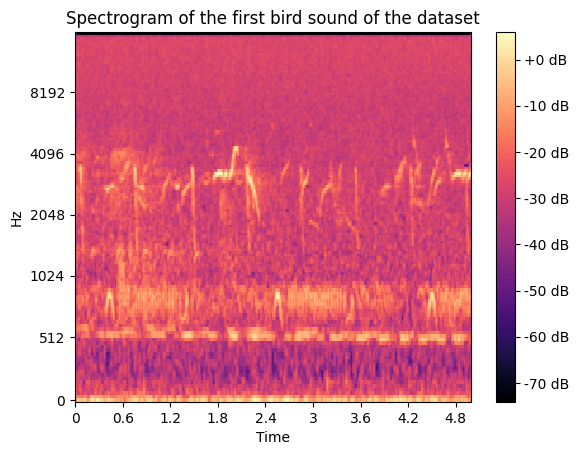

In [ ]:
# Get the first sound of the database
first_bird_sound = audio_data_X[0, :, :]

# Plot the spectrogram of the first sound of the dataset
librosa.display.specshow(first_bird_sound, sr=32000, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')  # Add a color bar for intensity scale
plt.title('Spectrogram of the first bird sound of the dataset')
plt.show()

In [ ]:
# Check the min and max values of raw X audio

print("Minimum value of the raw X audio:", np.min(audio_data_X))
print("Maximum value of the raw X audio:", np.max(audio_data_X))

Minimum value of the raw X audio: 0.0
Maximum value of the raw X audio: 1.0


In [ ]:
# Normalize the raw X audio data to a range of 0 to 1 using floating-point numbers
# Normalize the array
audio_data_X = (audio_data_X - np.min(audio_data_X)) / (np.max(audio_data_X) - np.min(audio_data_X))

# Check the min and max values of normalized X audio
print("Minimum value of X audio:", np.min(audio_data_X))
print("Maximum value of X audio:", np.max(audio_data_X))

Minimum value of X audio: 0.0
Maximum value of X audio: 1.0


In [ ]:
# Load the eBird_Taxonomy CSV file into a pandas DataFrame
eBird_Taxonomy_v2021 = pd.read_csv("/content/eBird_Taxonomy_v2021.csv")

# Print the first few rows of the CSV (the "head" of the dataset)
eBird_Taxonomy_v2021.head()

,TAXON_ORDER,CATEGORY,SPECIES_CODE,PRIMARY_COM_NAME,SCI_NAME,ORDER1,FAMILY,SPECIES_GROUP,REPORT_AS
0,1,species,ostric2,Common Ostrich,Struthio camelus,Struthioniformes,Struthionidae (Ostriches),Ostriches,NaN
1,6,species,ostric3,Somali Ostrich,Struthio molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
2,7,slash,y00934,Common/Somali Ostrich,Struthio camelus/molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
3,8,species,grerhe1,Greater Rhea,Rhea americana,Rheiformes,Rheidae (Rheas),Rheas,NaN
4,14,species,lesrhe2,Lesser Rhea,Rhea pennata,Rheiformes,Rheidae (Rheas),NaN,NaN


In [ ]:
# Load the train_metadata CSV file into a pandas DataFrame
train_metadata = pd.read_csv("/content/train_metadata.csv")

# Print the first few rows of the CSV (the "head" of the dataset)
train_metadata.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
0,abethr1,[],['song'],4.3906,38.2788,Turdus tephronotus,African Bare-eyed Thrush,Rolf A. de By,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/128013,abethr1/XC128013.ogg
1,abethr1,[],['call'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/363501,abethr1/XC363501.ogg
2,abethr1,[],['song'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/363502,abethr1/XC363502.ogg
3,abethr1,[],['song'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/363503,abethr1/XC363503.ogg
4,abethr1,[],"['call', 'song']",-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,4.5,https://www.xeno-canto.org/363504,abethr1/XC363504.ogg


In [ ]:

# Convert the 'train_metadata' DataFrame to a NumPy array.
train_metadata_raw = train_metadata.values

# Extract the bird names from the first column and convert them to strings.
train_metadata_raw_bird_name = train_metadata_raw[:, 0].astype('str')

# Extract latitude and longitude values from the respective columns and convert to floats.
latitude = train_metadata_raw[:, 3].astype('float')
longitude = train_metadata_raw[:, 4].astype('float')

# Extract unique bird names from the second column of 'audio_data_Y_unique_bird_name_with_id'.
unique_bird_name = audio_data_Y_unique_bird_name_with_id[:, 1]

# Initialize dictionaries to store mean latitude and longitude for each bird.
latitude_mean_mapping = {}
longitude_mean_mapping = {}

# Create an array by stacking 'train_metadata_raw_bird_name' and 'latitude'.
bird_name_with_latitude = np.column_stack((train_metadata_raw_bird_name, latitude))

# Create an array by stacking 'bird_name_with_latitude' and 'longitude'.
latitude_and_longitude = np.column_stack((bird_name_with_latitude, longitude))

# Iterate through unique bird names.
for bird_name in unique_bird_name:
    # Filter data for the current bird name.
    bird_values = latitude_and_longitude[latitude_and_longitude[:, 0] == bird_name]

    # Calculate the mean latitude and longitude for the current bird.
    latitude_mean = np.nanmean(bird_values[:, 1].astype('float'))
    longitude_mean = np.nanmean(bird_values[:, 2].astype('float'))

    # Store the mean values in dictionaries.
    latitude_mean_mapping[bird_name] = latitude_mean
    longitude_mean_mapping[bird_name] = longitude_mean

# Check for NaN values in latitude and longitude.
pred1 = np.isnan(latitude_and_longitude[:, 1].astype('float'))
pred2 = np.isnan(latitude_and_longitude[:, 2].astype('float'))

# Iterate through unique bird names.
for bird_name in unique_bird_name:
    # Filter data for the current bird name.
    pred3 = (latitude_and_longitude[:, 0] == bird_name)

    # Fill NaN latitude and longitude values with the corresponding means.
    latitude_and_longitude[pred1 & pred3, 1] = latitude_mean_mapping[bird_name]
    latitude_and_longitude[pred2 & pred3, 2] = longitude_mean_mapping[bird_name]

# Extract latitude and longitude after filling missing values.
latitude = latitude_and_longitude[:, 1].astype('float')
longitude = latitude_and_longitude[:, 2].astype('float')

# Normalize latitude and longitude values.
normalized_latitude = (latitude - latitude.min()) / (latitude.max() - latitude.min())
normalized_longitude = (longitude - longitude.min()) / (longitude.max() - longitude.min())

# Create an array by stacking normalized latitude and longitude.
metadata_latitude_and_longitude = np.column_stack((normalized_latitude, normalized_longitude))

# Check the shape of the resulting array.
metadata_latitude_and_longitude.shape


(16941, 2)

In [ ]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, categories='auto')

# Reshape author into 2D
author = train_metadata_raw[:, 7].reshape(-1, 1).astype('str')

# Fit and transform the OneHotEncoder
metadata_author = encoder.fit_transform(author)

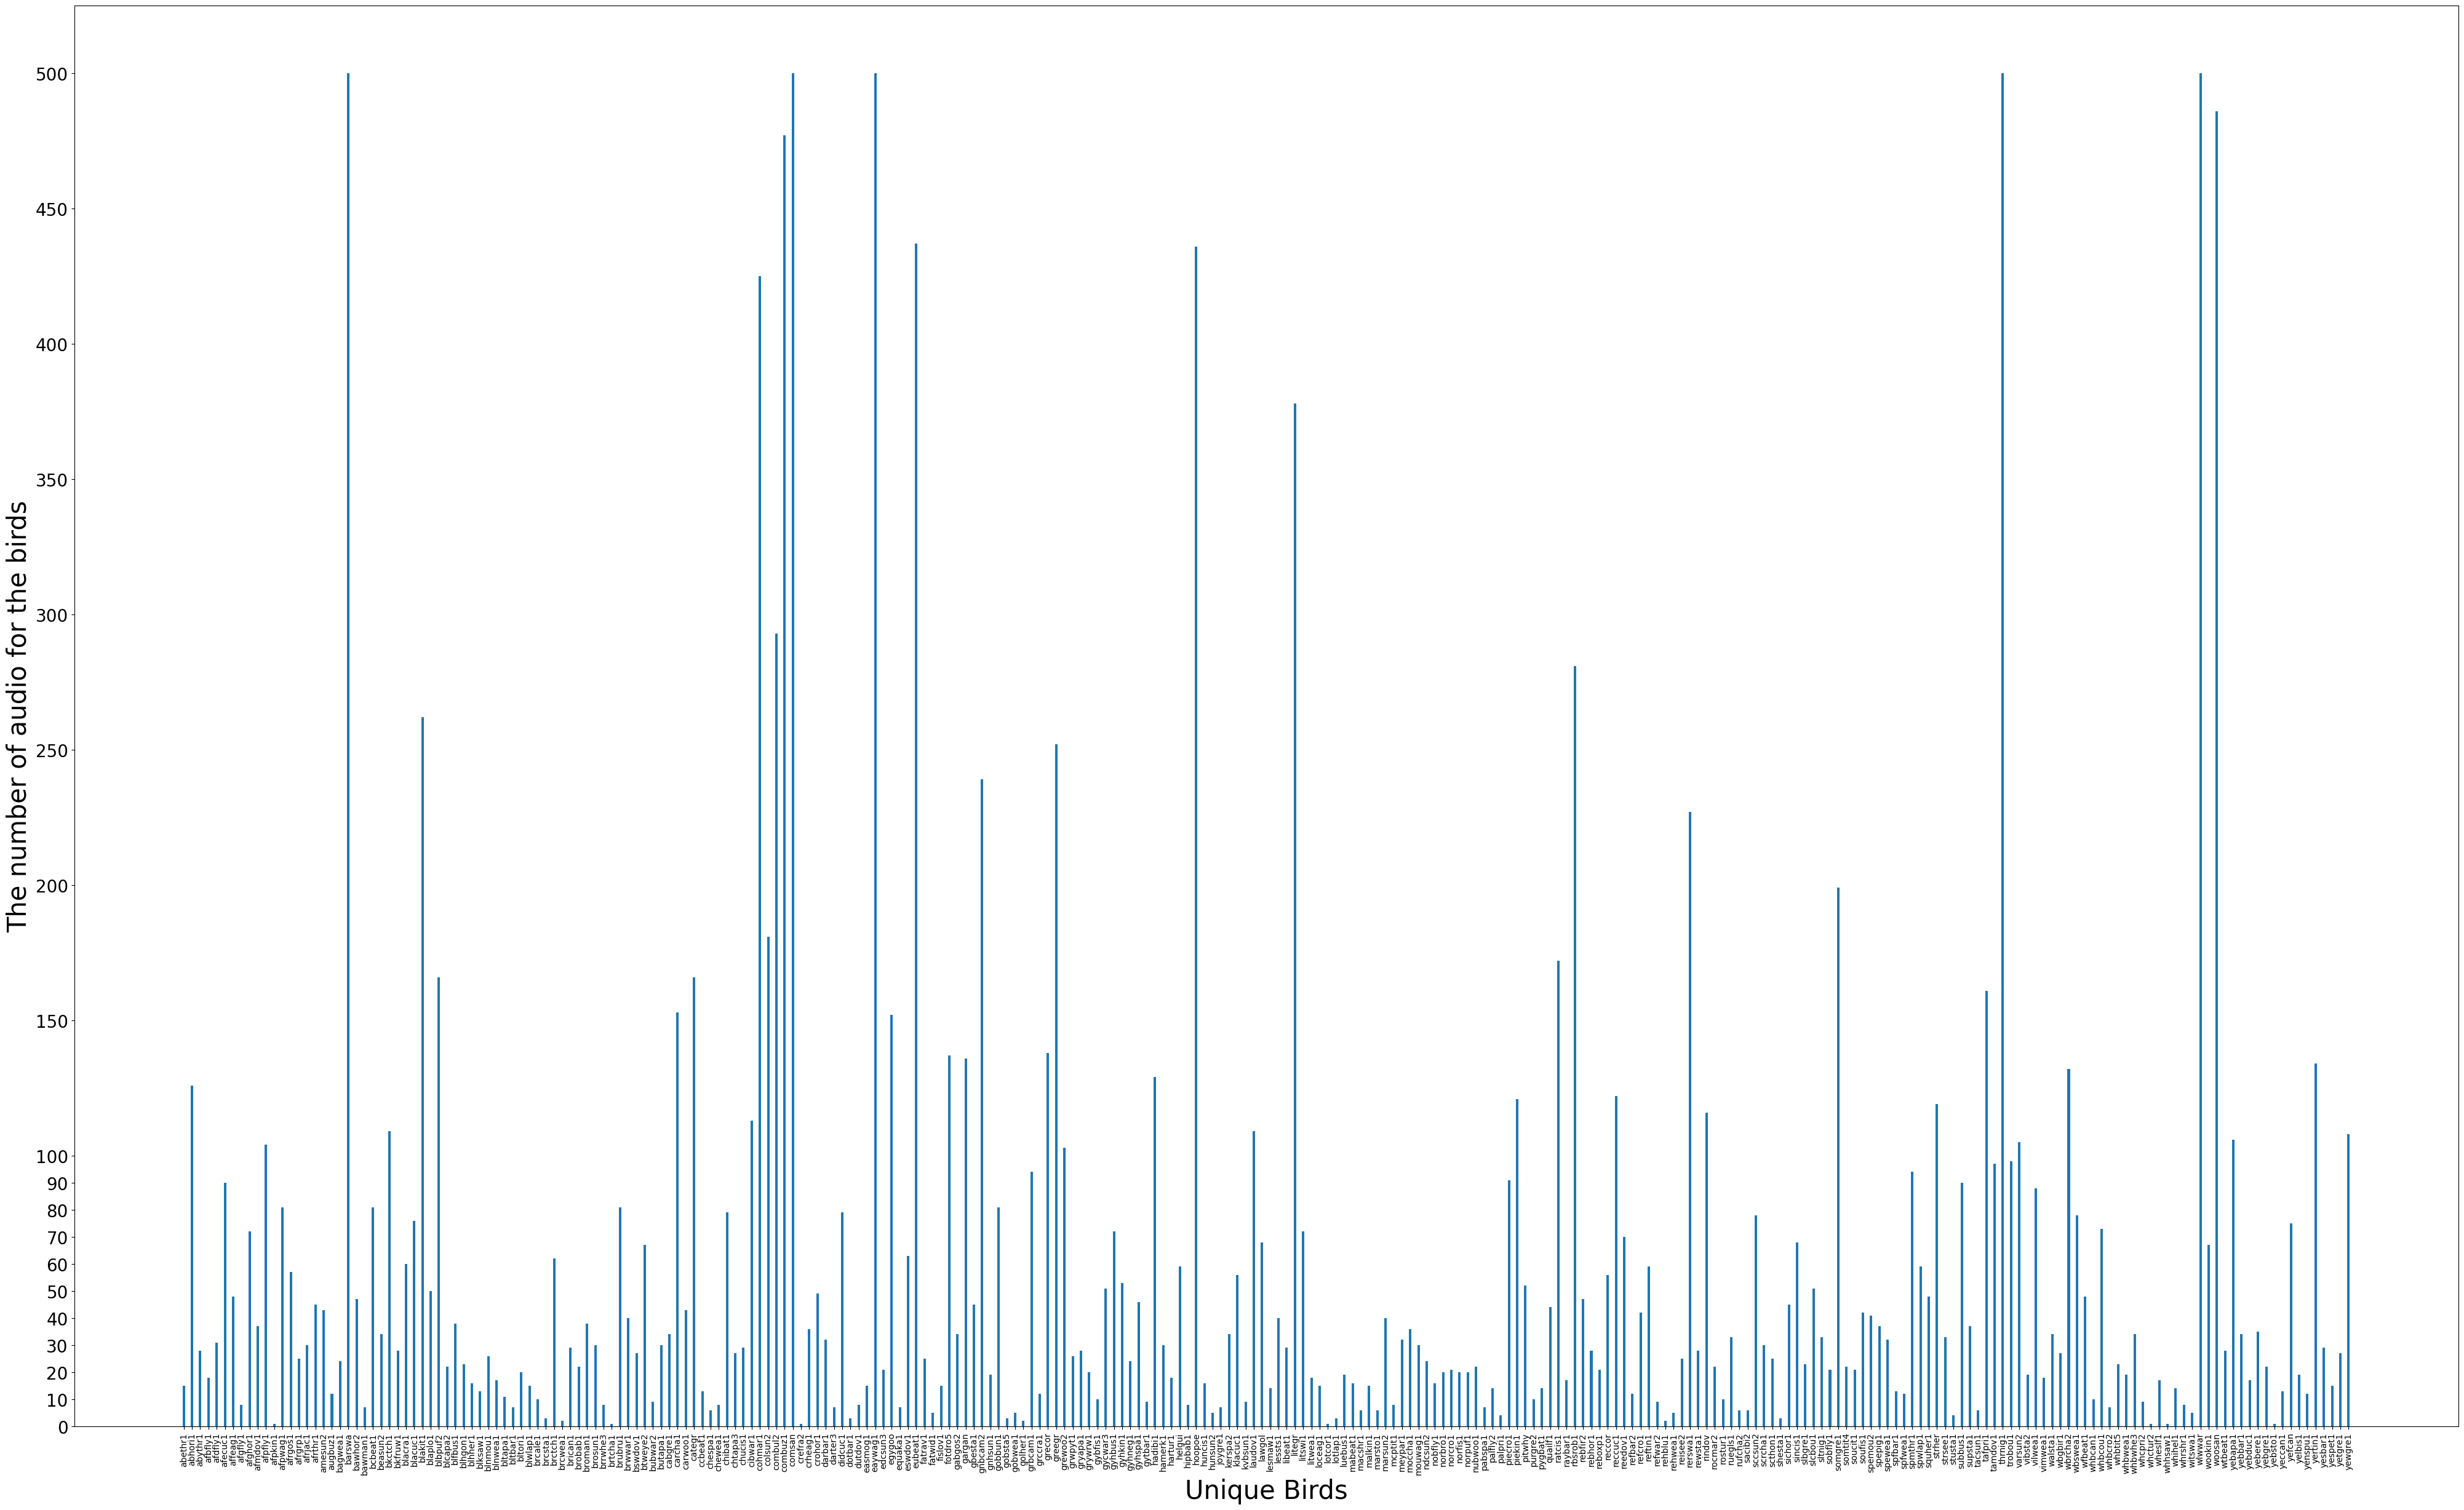

In [ ]:
# Calculate the unique values and their frequencies
unique_bird, counts = np.unique(audio_data_Y_bird_name, return_counts=True)
plt.figure(figsize=(50, 30))

# Create a bar plot (histogram)
plt.bar(unique_bird, counts, width=0.3)

# Set labels for the axes
plt.xlabel('Unique Birds', fontsize=30)
plt.ylabel('The number of audio for the birds', fontsize=30)
plt.xticks(rotation=90)
yticks_positions = np.append(np.arange(0, 100, 10),np.arange(100, max(counts) + 1, 50))  # Adjust the step (5) as needed
plt.yticks(yticks_positions, fontsize=20)
# Show the plot
plt.show()

##Variables:
#### **audio_data_Y_unique_bird_name_with_id**: This is a two-dimensional array with a shape of (264, 2). The first column represents the ID, and the second column contains the names of the 264 unique birds.

#### **audio_data_Y**: This is a two-dimensional array with a shape of (16941,). Each row's bird ID corresponds to the matching column number in the other array.

#### **metadata_author**: This is a two-dimensional array with a shape of (16941, 1082). Each author has been one-hot encoded, resulting in 1082 unique authors. There are 16941 rows in total.

#### **latitude_and_longitude**: This array has a shape of (16941, 2), and the values have been normalized to a range between 0 and 1. The first column represents latitude, and the second column represents longitude. There are 16941 rows in this dataset.

#### **audio_data_X**: This is a three-dimensional array with a shape of (16941, 128, 313). There are 16941 records in total. The number 128 corresponds to the frequency bands into which the audio has been split, and the number 313 represents the division of the 5-second duration audios into 313 segments.
